# Reducing Features Using Principal Components

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Load the data
df = pd.read_csv("all_data.csv")

# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Standardize
X = StandardScaler().fit_transform(numeric_df)

# PCA to retain 99% variance
pca = PCA(n_components=0.99, whiten=True)

# Fit PCA
X_pca = pca.fit_transform(X)

# Output sizes
print('Original number of numeric features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])


Original number of numeric features: 537
Reduced number of features: 53


## Reducing Features When Data Is Linearly Inseparable

In [4]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import pandas as pd

# Load your movie dataset
df = pd.read_csv("all_data.csv")

# Select numeric columns only
numeric_df = df.select_dtypes(include='number')

# Standardize the numeric features
X = StandardScaler().fit_transform(numeric_df)

# Apply Kernel PCA with RBF kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

# Output sizes
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_kpca.shape[1])


Original number of features: 537
Reduced number of features: 1


Dataset Shape: (208, 61)
Classes: ['R' 'M']


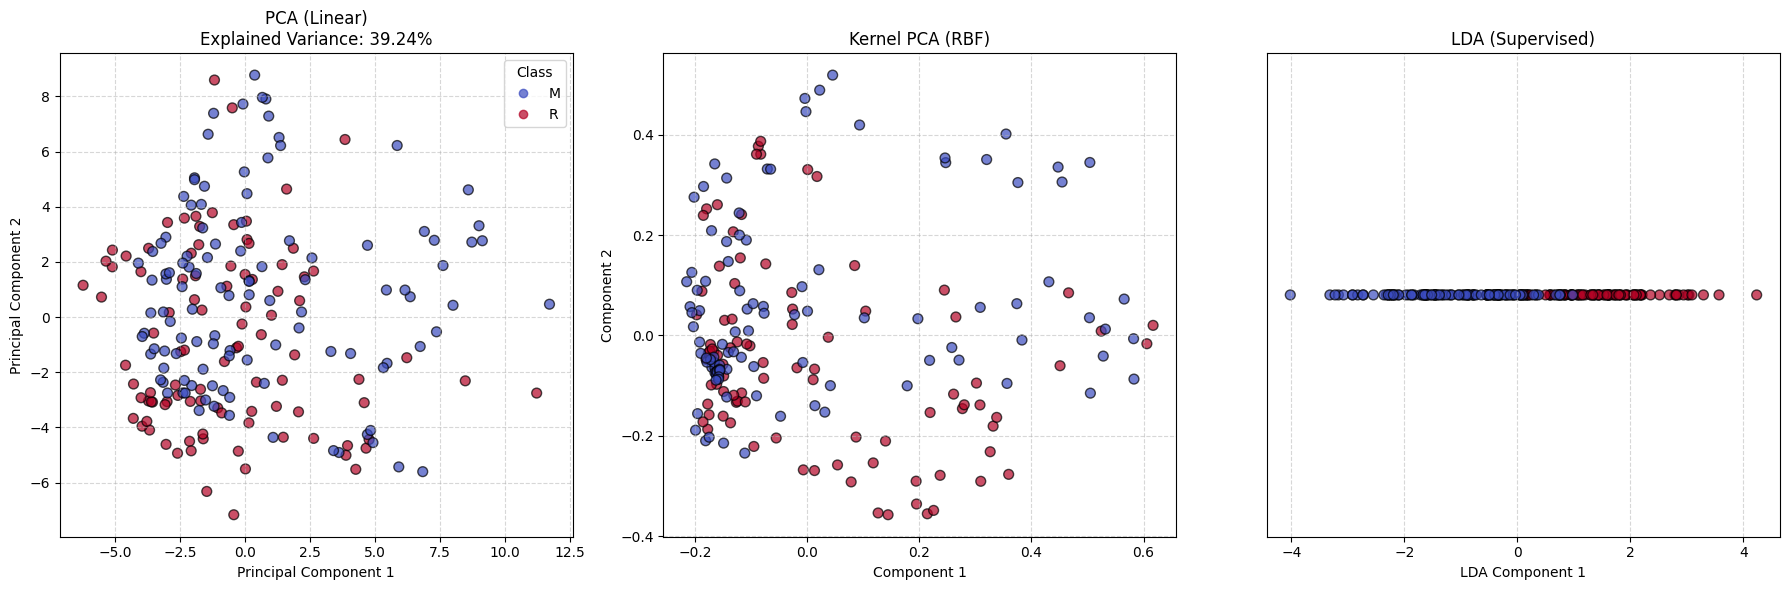

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Loading
df = pd.read_csv("sonar.csv", header=None)

print("Dataset Shape:", df.shape)
print("Classes:", df.iloc[:, -1].unique())

# Preprocessing
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
# 1. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_var = np.sum(pca.explained_variance_ratio_)

# 2. Kernel PCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_kpca = kpca.fit_transform(X_scaled)

# 3. LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Plotting
plt.figure(figsize=(18, 6))

# PCA Plot
plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title(f"PCA (Linear)\nExplained Variance: {pca_var:.2%}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=list(le.classes_), title="Class")
plt.grid(True, linestyle='--', alpha=0.5)

# Kernel PCA Plot
plt.subplot(1, 3, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title("Kernel PCA (RBF)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True, linestyle='--', alpha=0.5)

# LDA Plot
plt.subplot(1, 3, 3)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_encoded, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
plt.title("LDA (Supervised)")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

First 5 rows:
        0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.

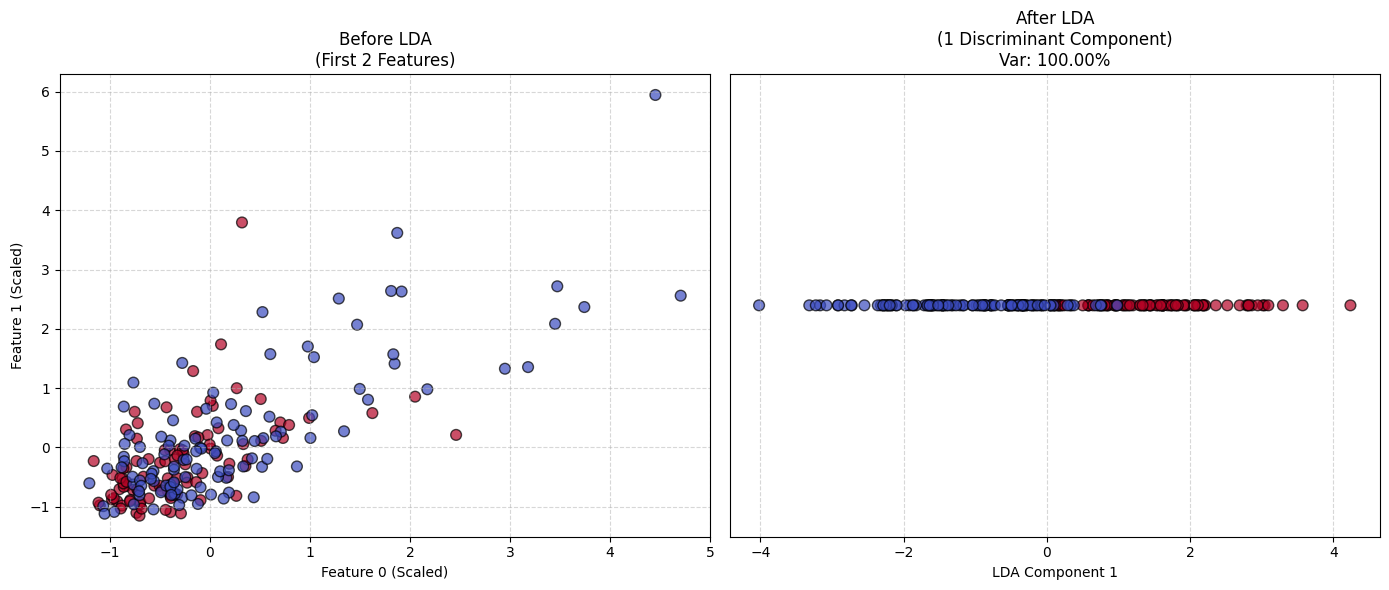

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Loading
df = pd.read_csv("sonar.csv", header=None)

print("First 5 rows:\n", df.head())
print("\nDataFrame Shape:", df.shape)

# Preprocessing
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print(f"\nFeatures shape: {X.shape}")
print(f"Target unique values: {y.unique()}")

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_numeric = X.select_dtypes(include='number') 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# LDA Reduction
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("\nOriginal feature count:", X.shape[1])
print("Reduced feature count:", X_lda.shape[1])
print("Explained variance ratio:", lda.explained_variance_ratio_)

# Plotting
plt.figure(figsize=(14, 6))

# Plot A: Before LDA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_encoded, cmap='coolwarm', edgecolors='k', s=60, alpha=0.7)
plt.title("Before LDA\n(First 2 Features)")
plt.xlabel("Feature 0 (Scaled)")
plt.ylabel("Feature 1 (Scaled)")
plt.grid(True, linestyle='--', alpha=0.5)

# Plot B: After LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda, np.zeros_like(X_lda), c=y_encoded, cmap='coolwarm', edgecolors='k', s=60, alpha=0.7)
plt.title(f"After LDA\n(1 Discriminant Component)\nVar: {lda.explained_variance_ratio_[0]:.2%}")
plt.xlabel("LDA Component 1")
plt.yticks([])
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()